In [1]:
!which python

/opt/anaconda3/envs/ai/bin/python


---

---

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_info = pd.read_csv('../data/lending_club_info.csv')

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
df_info

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


In [6]:
df = pd.read_csv('../data/lending_club_loan_two.csv')

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


---

<Axes: xlabel='loan_status', ylabel='count'>

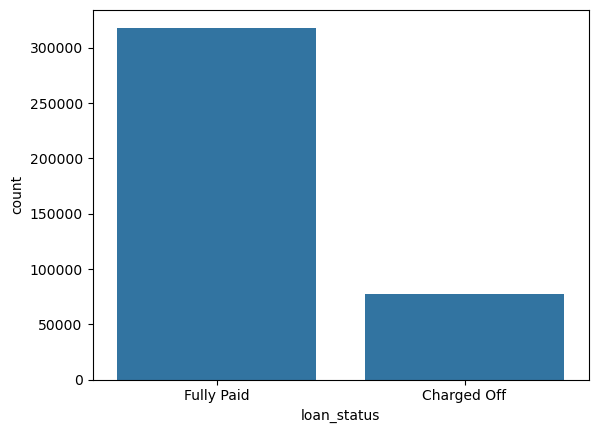

In [10]:
sns.countplot(x=df['loan_status'])

<Axes: xlabel='loan_amnt', ylabel='Count'>

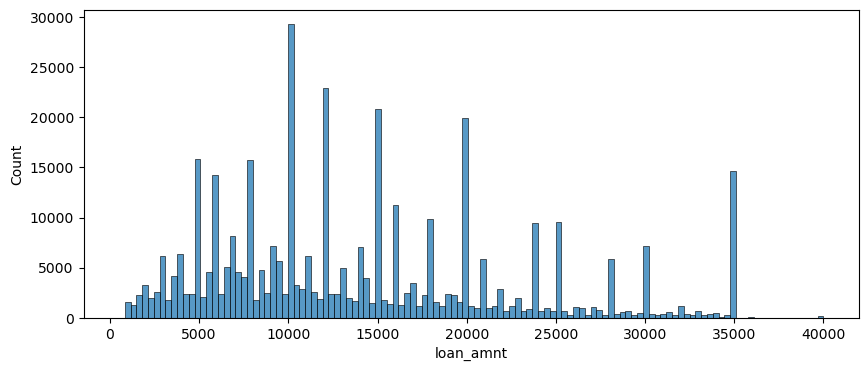

In [11]:
plt.figure(figsize=(10,4))
sns.histplot(df['loan_amnt'])

In [12]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

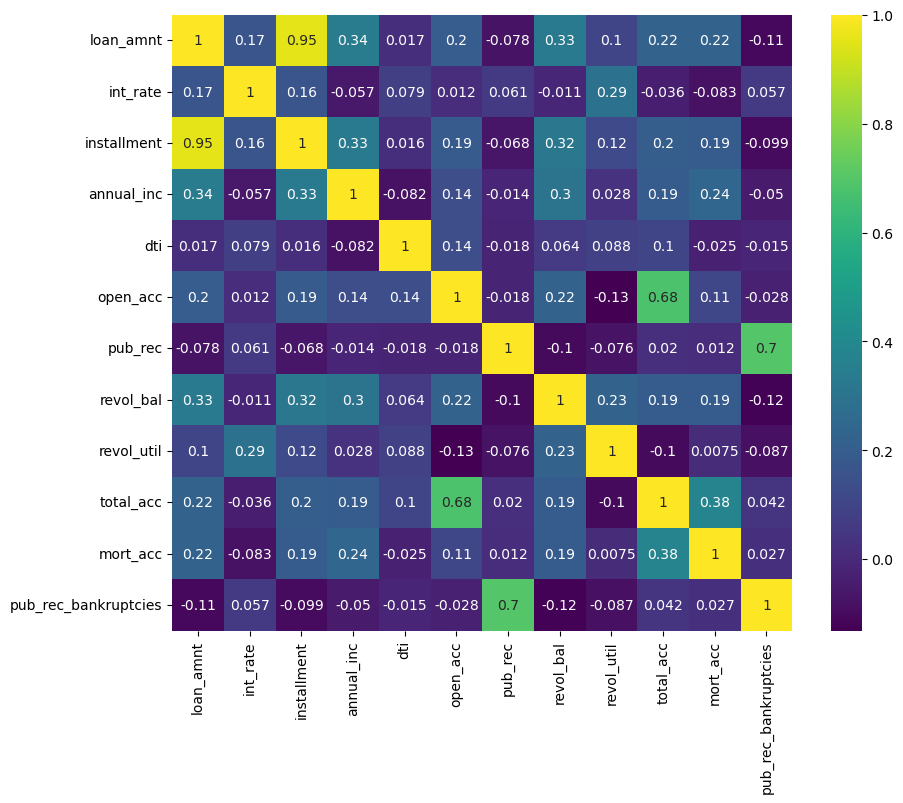

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

In [14]:
df_info[df_info['LoanStatNew'] == 'installment']

,LoanStatNew,Description
3,installment,The monthly payment owed by the borrower if the loan originates.


In [15]:
df_info[df_info['LoanStatNew'] == 'loan_amnt']

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."


<Axes: xlabel='installment', ylabel='loan_amnt'>

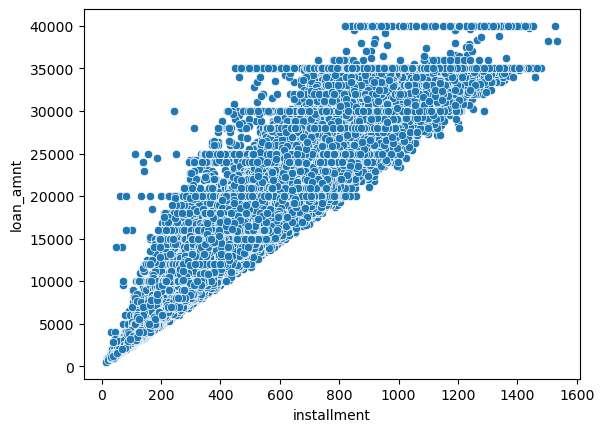

In [16]:
sns.scatterplot(df, x='installment', y='loan_amnt')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

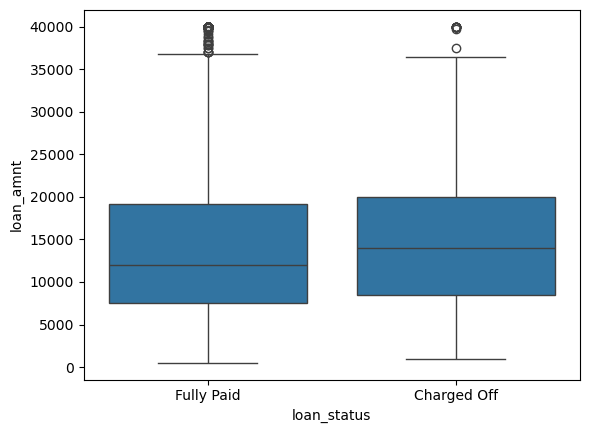

In [17]:
sns.boxplot(df, x='loan_status', y='loan_amnt')

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [19]:
df_info[df_info['LoanStatNew'] == 'grade']

,LoanStatNew,Description
4,grade,LC assigned loan grade


In [20]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [21]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

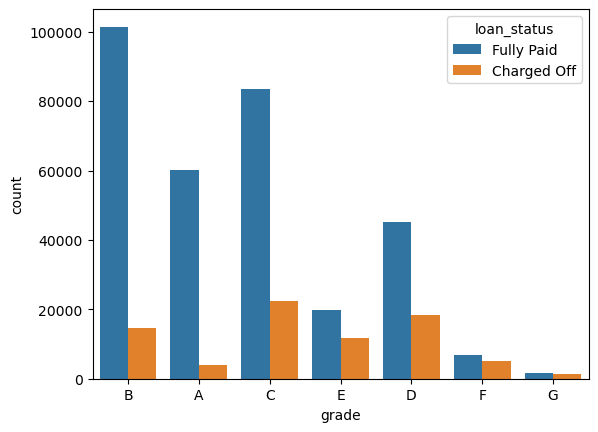

In [22]:
sns.countplot(df, x='grade', hue='loan_status')

/var/folders/f1/mvj8yhbn171_5nbjcy95zfp80000gn/T/ipykernel_7819/133608835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm')


<Axes: xlabel='sub_grade', ylabel='count'>

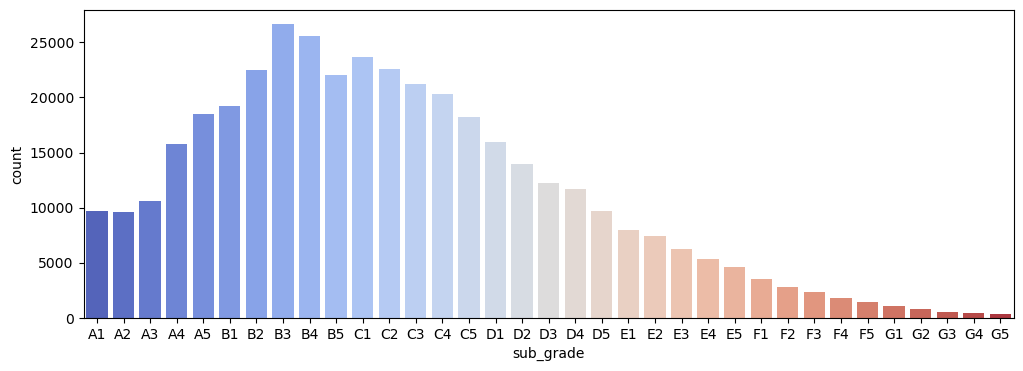

In [23]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

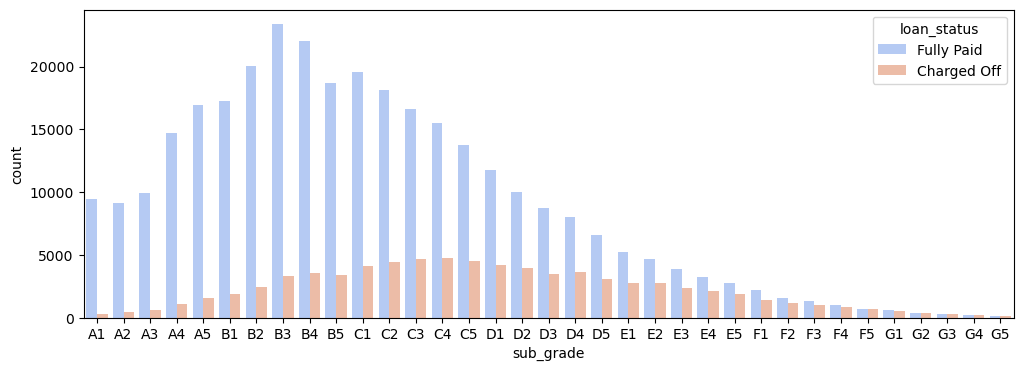

In [24]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

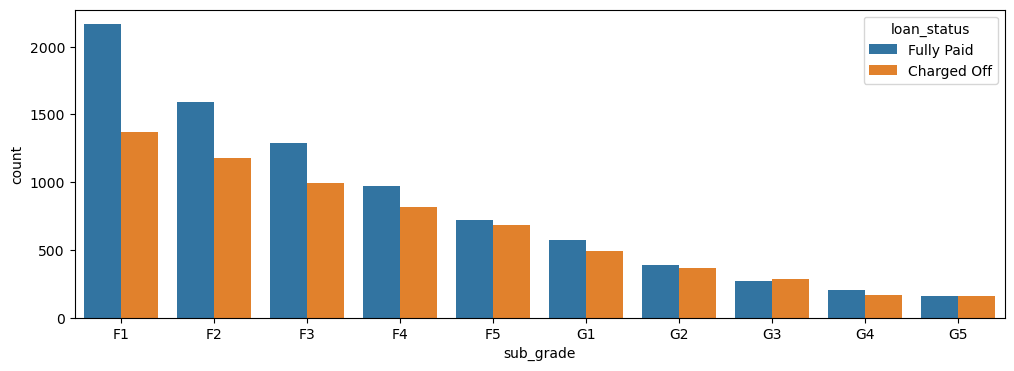

In [25]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [26]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [27]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [28]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

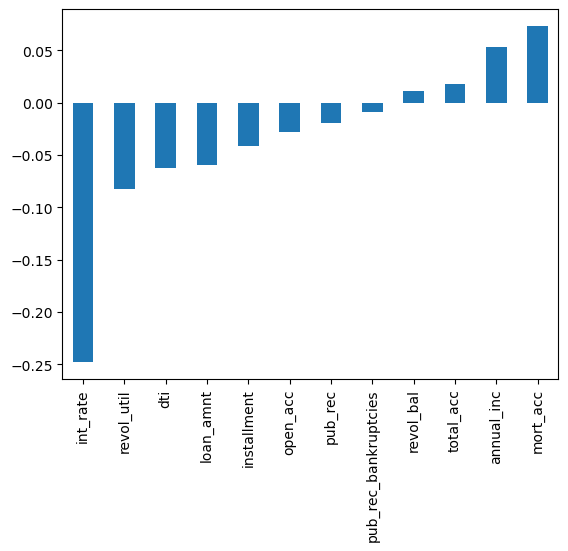

In [29]:
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---

---

In [30]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [31]:
len(df)

396030

In [32]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [33]:
df_info[df_info['LoanStatNew'] == 'emp_title'] #dropped

,LoanStatNew,Description
6,emp_title,The job title supplied by the Borrower when applying for the loan.*


In [34]:
df_info[df_info['LoanStatNew'] == 'emp_length'] #dropped

,LoanStatNew,Description
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


In [35]:
df_info[df_info['LoanStatNew'] == 'title'] #dropped

,LoanStatNew,Description
14,title,The loan title provided by the borrower


In [36]:
df_info[df_info['LoanStatNew'] == 'revol_util'] #dropped

,LoanStatNew,Description
22,revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."


In [37]:
df_info[df_info['LoanStatNew'] == 'mort_acc'] #filled with the mean of total_acc

,LoanStatNew,Description
26,mort_acc,Number of mortgage accounts.


In [38]:
df_info[df_info['LoanStatNew'] == 'pub_rec_bankruptcies'] #dropped

,LoanStatNew,Description
27,pub_rec_bankruptcies,Number of public record bankruptcies


In [39]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [40]:
df = df.drop('emp_title', axis=1)

<Axes: xlabel='emp_length', ylabel='count'>

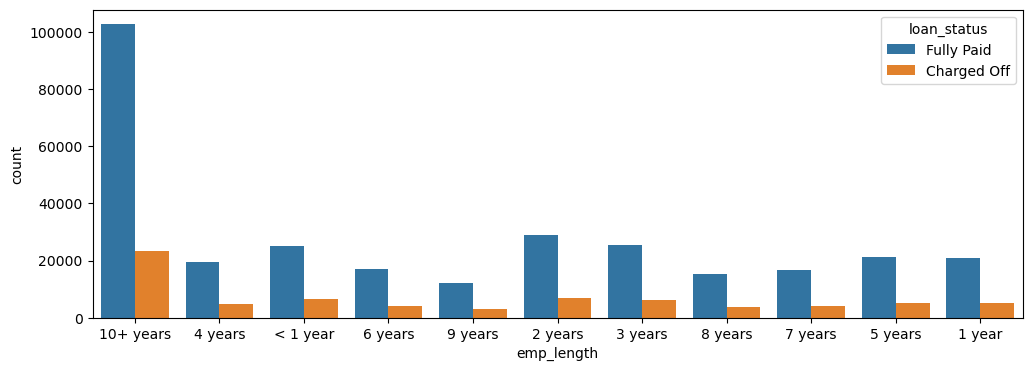

In [41]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='emp_length', hue='loan_status')

In [42]:
df = df.drop('emp_length', axis=1)

In [43]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [44]:
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [45]:
df = df.drop('title', axis=1)

In [46]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [47]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [48]:
total_acc_avg = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']

In [49]:
total_acc_avg[2.0]

0.0

In [50]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [51]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [52]:
df['mort_acc'].head()

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
Name: mort_acc, dtype: float64

In [53]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [54]:
df = df.dropna()

In [55]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [56]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [57]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [58]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [59]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [60]:
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [61]:
df_info[df_info['LoanStatNew'] == 'grade']

,LoanStatNew,Description
4,grade,LC assigned loan grade


In [62]:
df = df.drop('grade',axis=1)

In [63]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [64]:
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis=1)

In [65]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [66]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

In [67]:
df = df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1)

In [68]:
df = pd.concat([df, dummies], axis=1)

In [69]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [70]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [71]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHERS')

In [72]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

In [73]:
df = df.drop('home_ownership', axis=1)

In [74]:
df = pd.concat([df, dummies], axis=1)

In [75]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [76]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [77]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [78]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df = df.drop(['zip_code', 'address'], axis=1)
df = pd.concat([df, dummies], axis=1)

In [79]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [80]:
df = df.drop('issue_d',axis=1)

In [81]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [82]:
df = df.drop('loan_status',axis=1)

In [83]:
df.select_dtypes(['object']).columns

Index(['earliest_cr_line'], dtype='object')

In [84]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [85]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda year: int(year[-4:]))

In [86]:
df['earliest_cr_line'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_line, dtype: int64

In [87]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

---

---

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
X_train = scaler.fit_transform(X_train)

In [94]:
X_test = scaler.transform(X_test)

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

/opt/anaconda3/envs/ai/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [96]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

2025-07-10 12:29:05.446703: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-07-10 12:29:05.446742: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-07-10 12:29:05.446748: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-07-10 12:29:05.446969: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-10 12:29:05.446983: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [97]:
model.fit(
    x = X_train,
    y = y_train,
    epochs= 25,
    batch_size=256,
    validation_data=(X_test, y_test)
)

Epoch 1/25


2025-07-10 12:29:06.122419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1236/1236 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 0.3522 - val_loss: 0.2688
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.2855 - val_loss: 0.2697
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.2813 - val_loss: 0.2739
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.2797 - val_loss: 0.2679
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.2803 - val_loss: 0.2655
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.2799 - val_loss: 0.2712
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.2866 - val_loss: 0.2877
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.2888 - val_loss: 0.3144
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.3197 - val_loss: 0.2686
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.3074 - val_loss: 0.2814
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.3424 - val_loss: 0.3358
Epoch 12/25
1236/12

In [98]:
from tensorflow.keras.models import load_model

In [99]:
model.save('LDC_Model.h5')

---

In [100]:
losses = pd.DataFrame(model.history.history)

<Axes: >

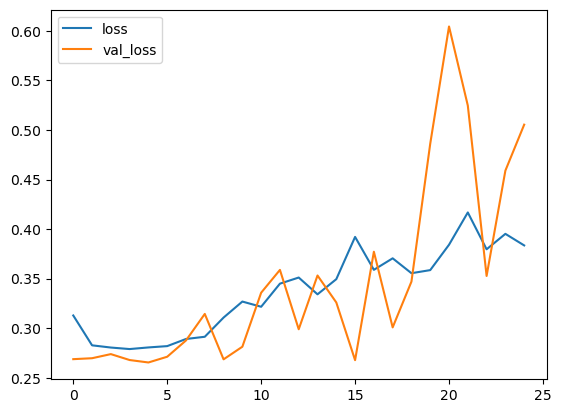

In [101]:
losses[['loss','val_loss']].plot()

In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
pred = (model.predict(X_test) > 0.5)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [104]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [105]:
confusion_matrix(y_test,pred)

array([[ 6720,  8938],
       [    0, 63386]])